# 02.- EXPLORING FOOD DATABASE

In this notebook we will inspect the information gathered in the previous notebook (01_creating_food_database).  
The objective is to handle errors and empty values but also generate new composite data or delete irrelevant col/rows.  

The database format will keep being a `pandas.DataFrame` that we'll export as a new `.csv` to work on metrics and graphics later on.

___
### IMPORTS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

sns.set(color_codes = True)

In [2]:
from funcs_data import nameof, display

In [3]:
### TODO ### Import a class from a module

# For a better pd.DataFrame visualization
class display(object):
    '''This class was found in 'Python Data Science Handbook' by jakevdp (Jake Vanderplas),
    which you can access though his GitHub repository
    (https://github.com/jakevdp/PythonDataScienceHandbook)'''
    
    template = '''<div style="float: left; padding: 10px;">
                  <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
                  </div>'''
    
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_()) for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a)) for a in self.args)

In [4]:
# This cell only needs to be executed to update funcs_driver
# and funcs_scrapping after them have been imported

# %run funcs_data
# %run funcs_driver.py
# %run funcs_scrapping.py

In [5]:
foods = pd.read_csv('./data/foods_raw.csv')
foods.head()

,foodname_ESP,foodname_ENG,quantity,energy,fats,prot,water,fiber,carbs,m_unsat_fats,...,C,calcium,iron,potassium,magnesium,sodium,phosphorus,iodide,selenium,zinc
0,Aceite de algodón,Cotton oil,100,888.0,100.0,0.0,0.0,0.0,0.0,17.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aceite de cacahuete,Peanut oil,100,887.0,99.9,0.0,0.1,0.0,0.0,47.80,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,Aceite de coco,Coconut oil,100,888.0,100.0,0.0,0.0,0.0,0.0,4.96,...,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aceite de colza,Rape oil,100,888.0,100.0,0.0,0.0,0.0,0.0,65.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
4,Aceite de germen de trigo,Wheat germ oil,100,887.0,99.9,0.0,0.1,0.0,0.0,15.10,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN


___
### QUICK DATA OVERVIEW

In [6]:
foods.shape

(968, 33)

In [7]:
foods.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   foodname_ESP  957 non-null    object 
 1   foodname_ENG  957 non-null    object 
 2   quantity      968 non-null    int64  
 3   energy        954 non-null    float64
 4   fats          892 non-null    float64
 5   prot          945 non-null    float64
 6   water         946 non-null    float64
 7   fiber         891 non-null    float64
 8   carbs         872 non-null    float64
 9   m_unsat_fats  786 non-null    float64
 10  p_unsat_fats  809 non-null    float64
 11  sat_fats      821 non-null    float64
 12  palm_acid     968 non-null    bool   
 13  chol          921 non-null    float64
 14  A             839 non-null    float64
 15  D             788 non-null    float64
 16  E             871 non-null    float64
 17  B9            902 non-null    float64
 18  B3            922 non-null    

The dataset has 968 entries, but only 957 have a name, let's check what do we have there:

In [8]:
foods[foods['foodname_ESP'].isnull()]

,foodname_ESP,foodname_ENG,quantity,energy,fats,prot,water,fiber,carbs,m_unsat_fats,...,C,calcium,iron,potassium,magnesium,sodium,phosphorus,iodide,selenium,zinc
186,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
696,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
898,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Yes!! A big amount of nothing. This goes to the 'Don't keep box'!

In [9]:
foods = foods[foods['foodname_ESP'].notnull()]
foods.reset_index(drop=True, inplace=True)
foods.shape[0]

957

Maybe some foods don't have any information, let's take out the foodname columns and check for `np.nan`.

In [10]:
foods.iloc[:,2:].dropna(axis='rows', how='all', inplace=True)  # equivalent to (axis='index', how = 'all')
foods.shape[0]  # If this returns the previous size, no rows were deleted

957

Are there any column that gives no information?

In [11]:
foods.isnull().all()

foodname_ESP    False
foodname_ENG    False
quantity        False
energy          False
fats            False
prot            False
water           False
fiber           False
carbs           False
m_unsat_fats    False
p_unsat_fats    False
sat_fats        False
palm_acid       False
chol            False
A               False
D               False
E               False
B9              False
B3              False
B2              False
B1              False
B12             False
B6              False
C               False
calcium         False
iron            False
potassium       False
magnesium       False
sodium          False
phosphorus      False
iodide          False
selenium        False
zinc            False
dtype: bool

Let's check if there are duplicate foods

In [12]:
foods.drop_duplicates(subset=['foodname_ESP','foodname_ENG'], inplace=True)
foods.shape[0]  # If this returns the previous size, no rows were deleted

957

In [13]:
# Other way to check it
foods[foods.duplicated(subset=['foodname_ESP','foodname_ENG']) == True]

,foodname_ESP,foodname_ENG,quantity,energy,fats,prot,water,fiber,carbs,m_unsat_fats,...,C,calcium,iron,potassium,magnesium,sodium,phosphorus,iodide,selenium,zinc


The `quantity` column doesn't give us any relevant information, it was imported just in case some measurements  
where made for other quantity different from 100g. Don't keep!

In [14]:
foods[foods['quantity'] != 100]

,foodname_ESP,foodname_ENG,quantity,energy,fats,prot,water,fiber,carbs,m_unsat_fats,...,C,calcium,iron,potassium,magnesium,sodium,phosphorus,iodide,selenium,zinc


In [15]:
foods.drop(labels='quantity', axis=1, inplace=True)
foods.head(2)

,foodname_ESP,foodname_ENG,energy,fats,prot,water,fiber,carbs,m_unsat_fats,p_unsat_fats,...,C,calcium,iron,potassium,magnesium,sodium,phosphorus,iodide,selenium,zinc
0,Aceite de algodón,Cotton oil,888.0,100.0,0.0,0.0,0.0,0.0,17.8,51.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aceite de cacahuete,Peanut oil,887.0,99.9,0.0,0.1,0.0,0.0,47.8,28.5,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0


Now let's take a closer look to the data

___
### DATA GROUPING (I)

The information in our dataset can be grouped for a better undestanding and to not overwhelm  
the user with information that can't understand or handle in various categories

In [16]:
general_info =  foods[['foodname_ESP', 'foodname_ENG']]
macros =        foods[['energy', 'fats', 'prot', 'carbs']]
complementary = foods[['water', 'fiber', 'p_unsat_fats',
                      'm_unsat_fats', 'sat_fats', 'chol']]  # unsat_fats to be created
flags =         foods[['palm_acid']]
minerals =      foods[['calcium', 'iron', 'potassium', 'magnesium',
                 'sodium', 'phosphorus', 'iodide', 'selenium',
                 'zinc']]
vitamins =      foods[['A', 'D', 'E', 'B9', 'B3', 'B2', 'B1',
                 'B12', 'B6', 'C']]
                 
# To check if any column was left behind
foods.shape[1] == general_info.shape[1] + macros.shape[1] + complementary.shape[1] + flags.shape[1] + minerals.shape[1] + vitamins.shape[1]

True

In [17]:
display('general_info', 'macros', 'complementary')

,foodname_ESP,foodname_ENG
0,Aceite de algodón,Cotton oil
1,Aceite de cacahuete,Peanut oil
2,Aceite de coco,Coconut oil
3,Aceite de colza,Rape oil
4,Aceite de germen de trigo,Wheat germ oil
...,...,...
952,"Zumo de pomelo, envasado",Grapefruit juice
953,"Zumo de tomate, fresco","Tomato, fresh juice"
954,Zumo de uva,Grape juice
955,Zumo de uva y melocotón,Grape and peach juice


In [18]:
display('flags', 'vitamins', 'minerals')

,palm_acid
0,True
1,True
2,True
3,True
4,False
...,...
952,False
953,False
954,False
955,False


___
### DATA GROUPING (II)

In [19]:
general_info.describe(include='all')

,foodname_ESP,foodname_ENG
count,957,957
unique,957,956
top,Aceite de algodón,Jelly
freq,1,2


In [20]:
# To check the repeated ENG names
foods[foods['foodname_ENG'] == 'Jelly']

,foodname_ESP,foodname_ENG,energy,fats,prot,water,fiber,carbs,m_unsat_fats,p_unsat_fats,...,C,calcium,iron,potassium,magnesium,sodium,phosphorus,iodide,selenium,zinc
360,Gelatina,Jelly,344.0,0.00,84.40,15.60,0.0,0.00,0.000,0.000,...,0.0,11.0,0.00,22.0,11.0,32.0,0.0,6.0,NaN,0.20
365,"Gominola, genérica",Jelly,268.0,0.02,4.63,12.86,1.0,69.95,0.001,0.004,...,0.9,7.0,0.19,54.0,6.0,30.0,6.0,4.0,0.4,0.03


In [21]:
# Change 'Gominola, genérica' for 'Jelly bean'
foods.iloc[365, 1] = 'Jelly bean'

# Check correct change
# general_info has to be regenerated
general_info =  foods[['foodname_ESP', 'foodname_ENG']]
general_info.nunique()

foodname_ESP    957
foodname_ENG    957
dtype: int64

___

In [22]:
macros.describe(include='all')

,energy,fats,prot,carbs
count,954.000000,892.000000,945.000000,872.000000
mean,220.627883,13.052508,10.586847,17.494367
std,189.592397,19.781830,9.868655,24.475590
min,0.000000,0.000000,0.000000,0.000000
25%,72.000000,0.800000,2.000000,0.350000
50%,158.000000,4.200000,8.000000,5.320000
75%,343.000000,18.132500,17.800000,22.225000
max,888.000000,100.000000,87.750000,100.000000


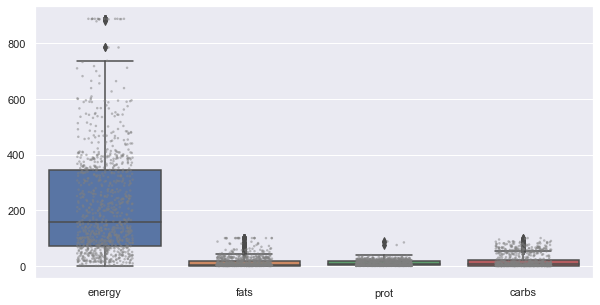

In [23]:
plt.figure(figsize=(10,5))
sample = macros

sns.boxplot(data=sample)
sns.stripplot(data=sample, color="grey", alpha=.5, jitter=0.2, size=2.5);

___

In [24]:
complementary.describe(include='all')

,water,fiber,p_unsat_fats,m_unsat_fats,sat_fats,chol
count,946.000000,891.000000,809.000000,786.000000,821.000000,921.000000
mean,57.773853,2.381836,2.823844,5.002219,4.456334,53.055874
std,30.954525,5.592567,7.863669,9.151397,7.446609,164.951759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.625000,0.000000,0.200000,0.200000,0.200000,0.000000
50%,69.500000,0.100000,0.700000,1.325000,1.400000,3.400000
75%,82.200000,2.300000,2.000000,6.575000,5.470000,69.000000
max,100.000000,58.200000,69.000000,78.200000,84.310000,2430.000000


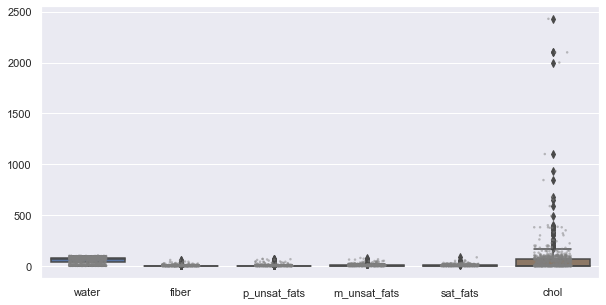

In [25]:
plt.figure(figsize=(10,5))
sample = complementary

sns.boxplot(data=sample)
sns.stripplot(data=sample, color="grey", alpha=.5, jitter=0.2, size=2.5);

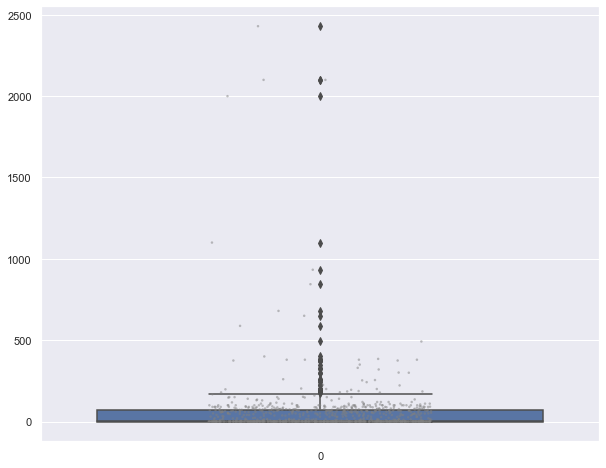

In [26]:
plt.figure(figsize=(10,8))
sample = foods['chol']

sns.boxplot(data=sample)
sns.stripplot(data=sample, color="grey", alpha=.5, jitter=0.2, size=2.5);

In [27]:
foods[['foodname_ESP', 'chol']][foods['chol'] > 1000]

,foodname_ESP,chol
410,"Huevo de gallina, yema, cruda",1100.0
411,"Huevo de gallina, yema, desecada",2430.0
836,"Sesos, de cerdo, crudos",2000.0
837,"Sesos, de cordero, crudos",2100.0
838,"Sesos, de ternera, crudos",2100.0


This values make sense, nothing to do here

___

In [28]:
minerals.describe(include='all')

,calcium,iron,potassium,magnesium,sodium,phosphorus,iodide,selenium,zinc
count,941.000000,925.000000,938.000000,937.000000,936.000000,934.00000,783.000000,833.000000,903.000000
mean,105.933055,3.558780,279.893031,40.077920,354.261692,172.51017,25.218467,15.732516,3.158920
std,208.709327,26.745499,353.496294,64.972043,1858.093103,173.53423,302.580696,98.352090,56.030889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,12.500000,0.400000,113.117500,12.000000,12.000000,43.00000,1.500000,1.000000,0.300000
50%,31.000000,1.000000,209.000000,21.000000,65.000000,132.60000,5.000000,4.000000,0.600000
75%,100.000000,2.170000,320.000000,35.000000,340.000000,226.75000,14.000000,17.700000,2.000000
max,1890.000000,785.630000,4000.000000,611.000000,38850.000000,1233.00000,8417.500000,2805.800000,1683.500000


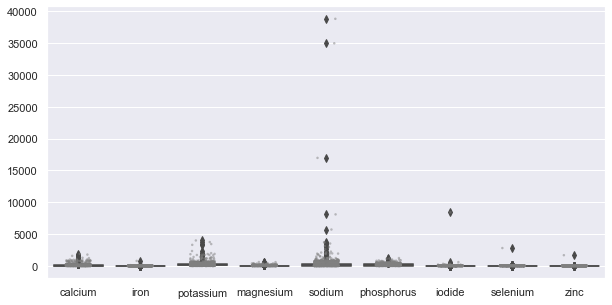

In [29]:
plt.figure(figsize=(10,5))
sample = minerals

sns.boxplot(data=sample)
sns.stripplot(data=sample, color="grey", alpha=.5, jitter=0.2, size=2.5);

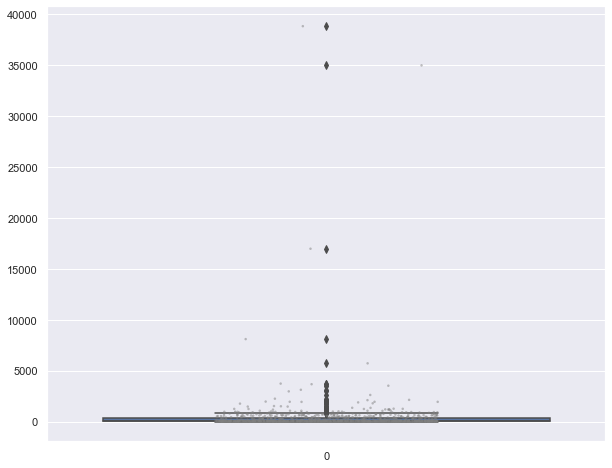

In [30]:
plt.figure(figsize=(10,8))
sample = foods['sodium']

sns.boxplot(data=sample)
sns.stripplot(data=sample, color="grey", alpha=.5, jitter=0.2, size=2.5);

In [31]:
foods[foods['sodium'] > 7500]

,foodname_ESP,foodname_ENG,energy,fats,prot,water,fiber,carbs,m_unsat_fats,p_unsat_fats,...,C,calcium,iron,potassium,magnesium,sodium,phosphorus,iodide,selenium,zinc
89,"Bacalao, salado, crudo","Cod, salted, raw",322.0,1.75,75.0,23.3,0.0,0.0,0.20,0.59,...,0.1,50.0,3.6,160.0,28.0,8100.0,891.0,60.0,28.0,1.0
307,Cubito de caldo,Stock powder,251.0,18.70,15.7,4.6,0.2,5.0,7.61,0.70,...,0.0,60.0,1.2,446.0,55.4,16982.0,320.0,NaN,27.6,0.8
795,Sal de mar,Sea salt,0.0,NaN,0.0,4.0,0.0,0.0,NaN,NaN,...,0.0,110.0,2.0,56.0,70.0,35000.0,1.0,74.0,0.0,0.1
796,Sal yodada,Iodized salt,0.0,0.00,0.0,NaN,0.0,0.0,0.00,0.00,...,0.0,29.0,0.2,NaN,290.0,38850.0,8.0,600.0,0.1,NaN


This values make sense, nothing to do here

___

In [32]:
vitamins.describe(include='all')

,A,D,E,B9,B3,B2,B1,B12,B6,C
count,839.000000,788.000000,871.000000,902.000000,922.000000,908.000000,906.000000,902.000000,910.000000,817.000000
mean,217.855149,2.196395,2.542208,41.832223,4.356683,0.657793,0.914120,1.520144,0.526317,12.231800
std,1814.448394,21.962373,20.797713,377.225125,33.429669,10.703801,20.097596,5.000697,5.181221,119.758666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245000,0.000000,0.100000,4.000000,0.300000,0.050000,0.030000,0.000000,0.060000,0.000000
50%,15.000000,0.000000,0.500000,11.000000,1.500000,0.130000,0.070000,0.170000,0.100000,0.000000
75%,72.416650,0.250000,1.100000,25.900000,5.000000,0.240000,0.150000,1.100000,0.300000,4.800000
max,44890.000000,561.160000,561.160000,11222.000000,1010.100000,310.000000,600.000000,81.000000,112.230000,3367.000000


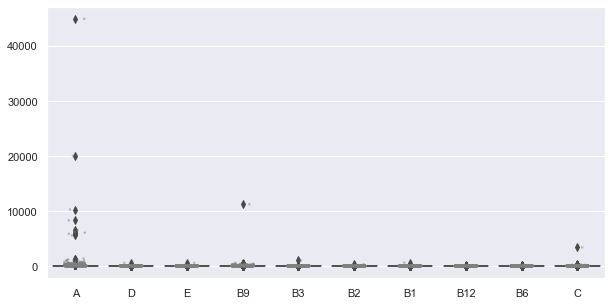

In [33]:
plt.figure(figsize=(10,5))
sample = vitamins

sns.boxplot(data=sample)
sns.stripplot(data=sample, color="grey", alpha=.5, jitter=0.2, size=2.5);

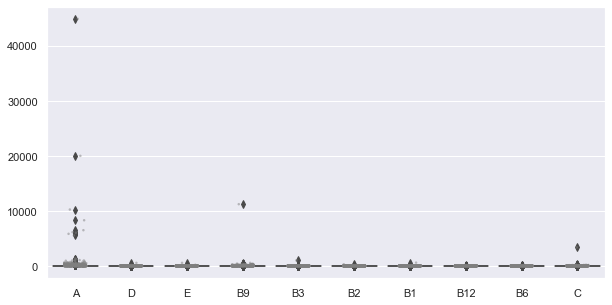

In [34]:
plt.figure(figsize=(10,5))
sample = vitamins

sns.boxplot(data=sample)
sns.stripplot(data=sample, color="grey", alpha=.5, jitter=0.2, size=2.5);

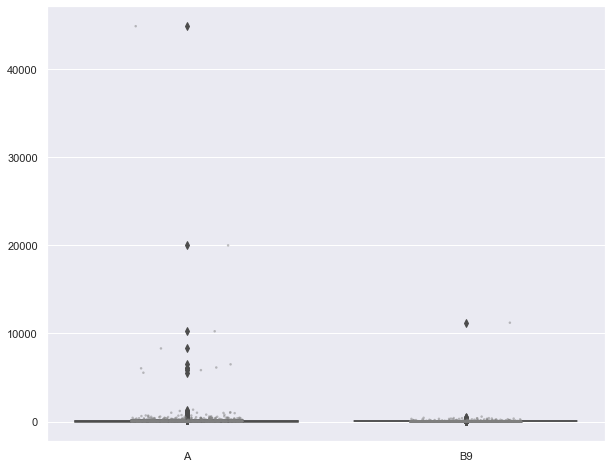

In [35]:
plt.figure(figsize=(10,8))
sample = foods[['A', 'B9']]

sns.boxplot(data=sample)
sns.stripplot(data=sample, color="grey", alpha=.5, jitter=0.2, size=2.5);

In [36]:
A_out = foods['A'] > 11000
B9_out = foods['B9'] > 5000

foods[['foodname_ESP', 'A', 'B9']][A_out | B9_out]

,foodname_ESP,A,B9
7,Aceite de hígado de bacalao,20000.0,NaN
267,Complejo vitaminico,44890.0,11222.0


'Complejo vitamínico' is not a relevant food, so I'll delete it

In [37]:
foods = foods[foods['foodname_ESP'] != 'Complejo vitaminico']
foods.reset_index(drop=True, inplace=True)

This values make sense, nothing to do here

___
### GENERATING COMPOSITE COLUMNS

Our dataset has a lot of information but we need some composite data:
* unsat_fats = m_unsat_fats + p_unsat_fats  
* salt = 2.5 * sodium

In [41]:
# To build unsat_fats column we need to fill null values with 0 before aplying
# `pd.DataFrame.add()`- If data in both corresponding DataFrame locations
# is missing the result will be missing.

# Other way to do this
# foods.loc[:, 'm_unsat_fats'].fillna(0, inplace=True)
foods['m_unsat_fats'] = foods['m_unsat_fats'].fillna(0)
foods['p_unsat_fats'] = foods['p_unsat_fats'].fillna(0)

foods['unsat_fats'] = foods[['m_unsat_fats', 'p_unsat_fats']].sum(axis=1)

In [43]:
foods[['m_unsat_fats','p_unsat_fats', 'unsat_fats']]

,m_unsat_fats,p_unsat_fats,unsat_fats
0,17.8000,51.900,69.7000
1,47.8000,28.500,76.3000
2,4.9600,0.770,5.7300
3,65.3000,28.010,93.3100
4,15.1000,61.700,76.8000
...,...,...,...
951,0.0000,0.000,0.0000
952,0.0075,0.020,0.0275
953,0.0000,0.000,0.0000
954,0.0570,0.140,0.1970


___

In [44]:
# Let's fill 'sodium' null values with 0 too before generating 'salt' columns
foods['sodium'] = foods['sodium'].fillna(0)

foods['salt'] = foods['sodium'] * 2.5

In [45]:
foods[['sodium', 'salt']]

,sodium,salt
0,0.0,0.00
1,0.0,0.00
2,0.0,0.00
3,0.0,0.00
4,0.0,0.00
...,...,...
951,2.0,5.00
952,4.8,12.00
953,0.0,0.00
954,3.3,8.25


At this point let's fill all `np.nan` values with 0

In [46]:
foods.fillna(0, inplace=True)

___

In adition to the dataset, I also created some `pd.Series` with the srapped names  
of the products that belong to a certain group of foods. Let's get'em!

In [49]:
vegetables_group = pd.read_csv('./data/vegetables_group.csv', usecols=['vegetables_group'])
seafood_group = pd.read_csv('./data/seafood_group.csv', usecols=['seafood_group'])
sweets_group = pd.read_csv('./data/sweets_group.csv', usecols=['sweets_group'])
meat_group = pd.read_csv('./data/meat_group.csv', usecols=['meat_group'])
misc_group = pd.read_csv('./data/misc_group.csv', usecols=['misc_group'])
legumes_group = pd.read_csv('./data/legumes_group.csv', usecols=['legumes_group'])
fruits_group = pd.read_csv('./data/fruits_group.csv', usecols=['fruits_group'])
fats_oils_group = pd.read_csv('./data/fats_oils_group.csv', usecols=['fats_oils_group'])
drinks_group = pd.read_csv('./data/drinks_group.csv', usecols=['drinks_group'])
eggs_group = pd.read_csv('./data/eggs_group.csv', usecols=['eggs_group'])
dairy_group = pd.read_csv('./data/dairy_group.csv', usecols=['dairy_group'])
cereals_group = pd.read_csv('./data/cereals_group.csv', usecols=['cereals_group'])
# squeeze=True ---> If the parsed data only contains one column then return a Series.

# To easily assign the correct group to each food, a 'superlist' is created
groups = [vegetables_group, seafood_group, sweets_group, meat_group,
          misc_group, legumes_group, fruits_group, fats_oils_group,
          drinks_group, eggs_group, dairy_group, cereals_group]

And take a look

In [50]:
display('eggs_group', 'fats_oils_group', 'sweets_group')

,eggs_group
0,"Huevo de codorniz, entero, crudo"
1,Huevo de gallina fresco
2,"Huevo de gallina, clara, cruda"
3,"Huevo de gallina, escalfado"
4,"Huevo de gallina, frito"
5,"Huevo de gallina, hervido, duro"
6,"Huevo de gallina, pasado por agua"
7,"Huevo de gallina, revuelto, con mantequilla"
8,"Huevo de gallina, yema, cruda"
9,"Huevo de gallina, yema, desecada"


In [51]:
display('legumes_group', 'fruits_group')

,legumes_group
0,"Almendra, cruda"
1,"Almendra, cruda, con cáscara"
2,"Almendra, frita, salada"
3,"Almendra, tostada"
4,Altramuz
5,"Alubia blanca, en conserva"
6,"Alubia blanca, seca, cruda"
7,"Alubia negra, seca, remojada, hervida"
8,"Anacardo, crudo"
9,Avellana


In [52]:
display('drinks_group', 'vegetables_group', 'misc_group')

,drinks_group
0,Agua de la red
1,"Agua mineral, mineralización debil"
2,"Agua, con gas, embotellada"
3,Aguardiente
4,"Anís, seco"
...,...
75,"Zumo de pomelo, envasado"
76,"Zumo de tomate, fresco"
77,Zumo de uva
78,Zumo de uva y melocotón


In [53]:
display('cereals_group', 'seafood_group', 'meat_group', 'dairy_group')

,cereals_group
0,Almidón de arroz
1,Almidón de maíz
2,Almidón de trigo
3,Arroz
4,"Arroz hinchado, para el desayuno, enriquecido"
...,...
99,Semilla de lino
100,"Sémola de trigo, cruda"
101,"Sémola de trigo, hervida"
102,Sobao


Let's assign the correct group to each food

In [55]:
foods['group'] = ''
foods['group']

0       
1       
2       
3       
4       
      ..
951     
952     
953     
954     
955     
Name: group, Length: 956, dtype: object

In [56]:
for group in groups:
    foods.loc[foods['foodname_ESP'].isin(group.iloc[:,0]),'group'] = nameof(group, globals())[:-6]

Is there any food with no group?

In [57]:
foods[['foodname_ESP', 'group']][foods['group'] == '']

,foodname_ESP,group
866,Tofu,
874,"Tortilla, a la francesa",
875,"Trigo, entero, crudo",
879,"Turrón, tipo Alicante",
894,Vinagre de vino,
941,"Zanahoria, cruda",


For this foods, I will write the group one by one

In [60]:
foods.iloc[866, -1] = 'vegetables'
foods.iloc[874, -1] = 'eggs'
foods.iloc[875, -1] = 'cereals'
foods.iloc[879, -1] = 'sweets'
foods.iloc[894, -1] = 'misc'
foods.iloc[941, -1] = 'vegetables'

foods.iloc[[866, 874, 875, 879, 894, 941], [0, -1]]

,foodname_ESP,group
866,Tofu,vegetables
874,"Tortilla, a la francesa",eggs
875,"Trigo, entero, crudo",cereals
879,"Turrón, tipo Alicante",sweets
894,Vinagre de vino,misc
941,"Zanahoria, cruda",vegetables


___
### LAST BUT NOT LEAST

To make it easier to filter by foodname let's lowercase the names

In [61]:
foods['foodname_ESP'] = foods['foodname_ESP'].apply(lambda item: item.lower())
foods['foodname_ENG'] = foods['foodname_ENG'].apply(lambda item: item.lower())

foods[['foodname_ESP', 'foodname_ENG']].head()

,foodname_ESP,foodname_ENG
0,aceite de algodón,cotton oil
1,aceite de cacahuete,peanut oil
2,aceite de coco,coconut oil
3,aceite de colza,rape oil
4,aceite de germen de trigo,wheat germ oil


And export as `.csv` the database

In [62]:
foods.to_csv('./data/foods_refined.csv', encoding='utf-8')  ### TODO ### Export with MultiIndex